In [1]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
#đọc dữ liệu từ file csv
dt=pd.read_csv("airline.csv", encoding="ISO-8859-1")
#Xóa các dòng dữ liệu null
dt.dropna()
#Xóa các dòng dữ liệu bị trùng lặp
dt.drop_duplicates()
dt

,Airline,DestinationCountry
0,Air France,United States
1,Air France,Cote d'Ivoire
2,Air France,United States
3,Air France,Nigeria
4,Air France,Nigeria
...,...,...
6135,Virgin Atlantic Airlines,United States
6136,Virgin Atlantic Airlines,Saint Lucia
6137,Virgin Atlantic Airlines,Saint Lucia
6138,Virgin Atlantic Airlines,Saint Lucia


In [3]:
B = nx.Graph()
Airline = dt['Airline']
DestinationCountry = dt['DestinationCountry']
print('So Airline', Airline.nunique())
print('So DestinationCountry', DestinationCountry.nunique())
print('So canh', len(dt))

So Airline 15
So DestinationCountry 185
So canh 6140


In [4]:
for index, row in dt.iterrows():
    # Thêm cạnh vào đồ thị B, cạnh nối giữa hãng hàng không ('Airline') và quốc gia đích ('DestinationCountry')
    # Trọng số của cạnh được đặt là 1
    B.add_edge(row['Airline'], row['DestinationCountry'], weight=1)

# Thêm các đỉnh vào đồ thị B cho tập hợp các quốc gia đích ('DestinationCountry')
B.add_nodes_from(DestinationCountry,bipartite=0)
# Thêm các đỉnh vào đồ thị B cho tập hợp các hãng hàng không ('Airline')
B.add_nodes_from(Airline,bipartite=1)

<Figure size 1200x1200 with 0 Axes>

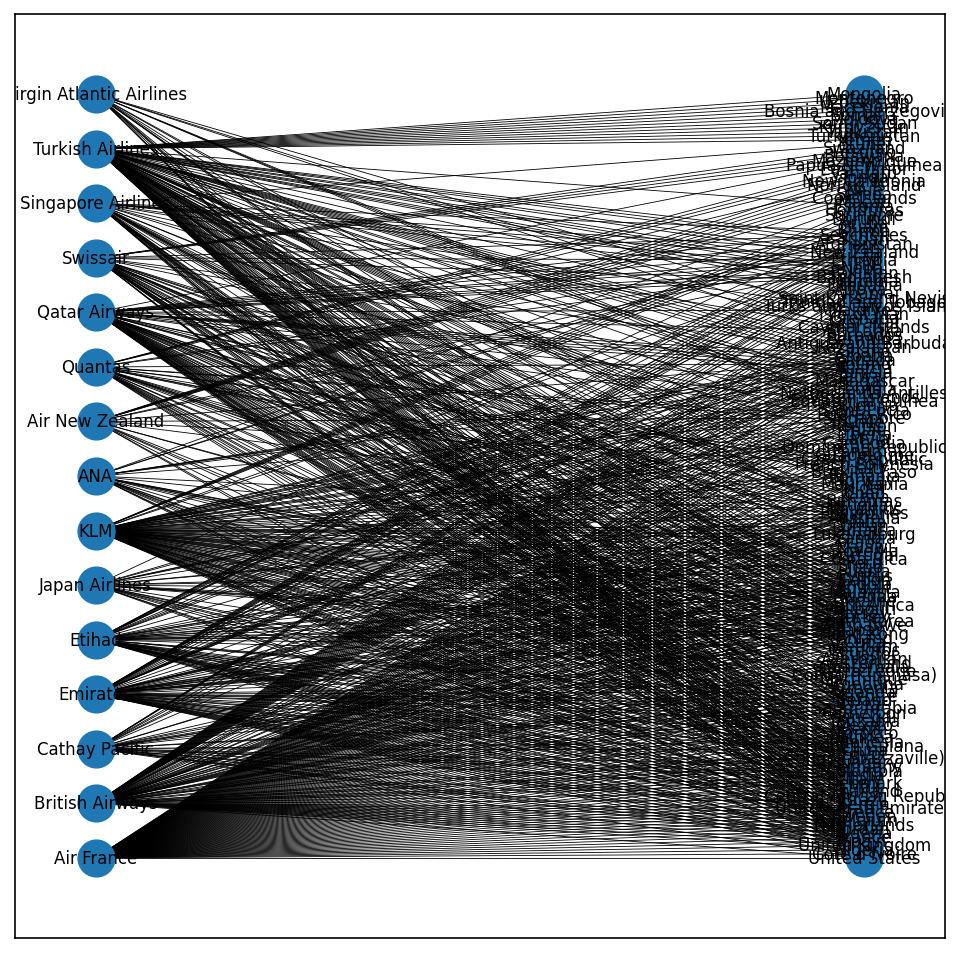

In [5]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Airline),font_size=8,width=0.4)

In [7]:
df = pd.read_csv('gephi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

,source,target
0,United States,Cyprus
1,United States,French Polynesia
2,United States,Jordan
3,United States,Swaziland
4,United States,Belgium
...,...,...
12255,Macedonia,Uzbekistan
12256,Macedonia,Mongolia
12257,Uzbekistan,Montenegro
12258,Uzbekistan,Mongolia


In [8]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 185
Số cạnh của đồ thị là 12260


In [9]:
nx.average_shortest_path_length(G)

1.2796709753231492

In [13]:
# average degree

average_degree = sum([len(list(G.neighbors(n))) for n in G.nodes()]) / len(G.nodes())

print('Average degree: ', average_degree)

Average degree:  132.54054054054055


# Harmonic centrality

In [11]:
#degree of each node
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

degree_df

,Node,Degree
0,United States,184
1,Cyprus,168
2,French Polynesia,133
3,Jordan,169
4,Swaziland,40
...,...,...
180,New Zealand,87
181,Oman,173
182,Gibraltar,87
183,Libya,133


In [15]:
harmonic_cen = nx.harmonic_centrality(G)

# Sắp xếp giảm dần các giá trị harmonic centrality và lưu vào sorted_closeness_centrality
sorted_closeness_centrality = sorted(harmonic_cen.items(), key=lambda x:x[1], reverse=True)
# Tạo DataFrame hiển thị thông tin harmonic centrality cho từng đỉnh
harmonic_cen_df = print_table(harmonic_cen.items(), ['Node', 'Harmonic centrality'])

harmonic_cen_df

,Node,Harmonic centrality
0,Palau,153.0
1,Saint Kitts and Nevis,135.5
2,Panama,157.0
3,Italy,177.0
4,Sierra Leone,165.0
...,...,...
180,Bahamas,161.5
181,United Kingdom,184.0
182,Japan,182.5
183,Peru,157.5


Biểu đồ thể hiện giá trị harmonic centrality của các node trong graph


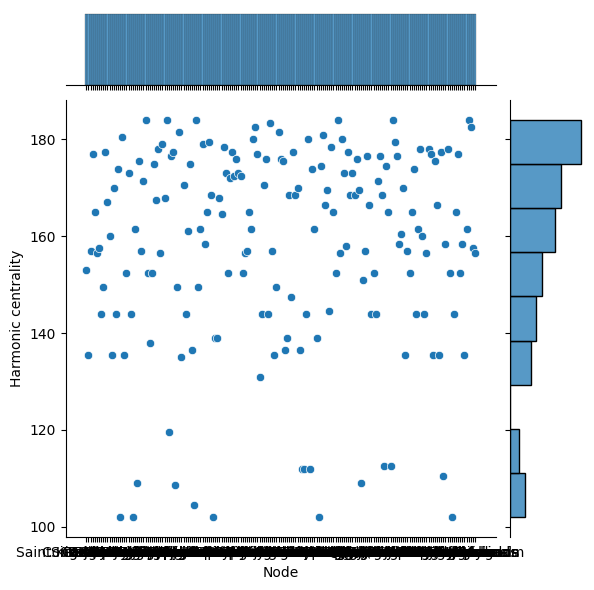

In [16]:
print(colored("Biểu đồ thể hiện giá trị harmonic centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Harmonic centrality", data=harmonic_cen_df)

Biểu đồ thể hiện phân bố harmonic centrality của các node trong graph


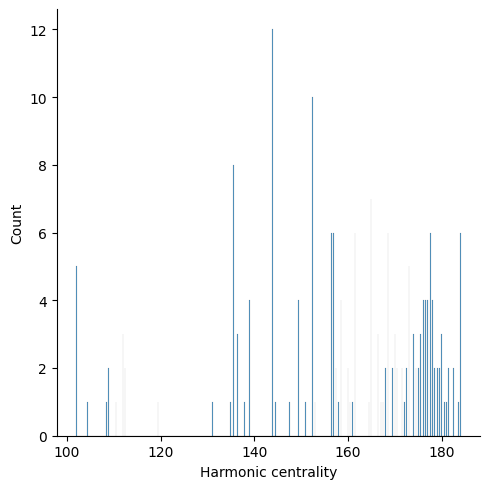

In [17]:
print(colored("Biểu đồ thể hiện phân bố harmonic centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Harmonic centrality", data=harmonic_cen_df, binwidth=0.15)

In [20]:
print('Top 10 quốc gia có Harmonic centrality cao nhất: ')
deg_cen = nx.degree_centrality(G) # return a dictionary
sorted_deg_cen = sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)
print_table(sorted_deg_cen[:10], ['DestinationCountry', 'Harmonic centrality'])

Top 10 quốc gia có Harmonic centrality cao nhất: 


,DestinationCountry,Harmonic centrality
0,United States,1.000000
1,United Arab Emirates,1.000000
2,United Kingdom,1.000000
3,Germany,1.000000
4,Hong Kong,1.000000
5,Singapore,1.000000
6,Australia,0.994565
7,China,0.983696
8,Japan,0.983696
9,Thailand,0.972826


In [21]:
print('Top 10 quốc gia có Harmonic centrality thấp nhất: ')
deg_cen = nx.degree_centrality(G) # return a dictionary
sorted_deg_cen = sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)
print_table(sorted_deg_cen[-10:], ['DestinationCountry', 'Harmonic centrality'])

Top 10 quốc gia có Harmonic centrality thấp nhất: 


,DestinationCountry,Harmonic centrality
0,Brunei,0.201087
1,Papua New Guinea,0.184783
2,East Timor,0.184783
3,Guam,0.179348
4,Macau,0.135870
5,Niue,0.108696
6,Norfolk Island,0.108696
7,Samoa,0.108696
8,Tonga,0.108696
9,Cook Islands,0.108696
